In [125]:
import parts_parser as pp


df, attrs_names = pp.load_parts('partitions.txt')
df

,groupName,partition,nodeId,primary,state,updateCounter,partitionSize,nodeAddresses,CELL
2402,test_cache_0,0,7451ec0b,P,OWNING,25,25,"127.0.0.1, 172.18.0.5",CELL-3
2403,test_cache_0,1,a669ba55,P,OWNING,28,28,"127.0.0.1, 172.18.0.20",CELL-5
2408,test_cache_0,2,5aecd2bf,P,OWNING,28,28,"127.0.0.1, 172.18.0.10",CELL-7
2410,test_cache_0,3,c8739069,P,OWNING,23,23,"127.0.0.1, 172.18.0.11",CELL-8
2413,test_cache_0,4,dffc0691,P,OWNING,40,40,"127.0.0.1, 172.18.0.6",CELL-5
...,...,...,...,...,...,...,...,...,...
36179,test_cache_affinity,1019,7ef8e144,P,OWNING,452,452,"127.0.0.1, 172.18.0.19",CELL-6
36181,test_cache_affinity,1020,e489054e,P,OWNING,474,474,"127.0.0.1, 172.18.0.17",CELL-2
36184,test_cache_affinity,1021,a37f9474,P,OWNING,445,445,"127.0.0.1, 172.18.0.22",CELL-4
36187,test_cache_affinity,1022,a669ba55,P,OWNING,455,455,"127.0.0.1, 172.18.0.20",CELL-5


In [126]:
parts_df = df[['groupName', 'partition', 'partitionSize']]

parts_grouped_by_group = parts_df.groupby('groupName')['partitionSize']
parts_grouped_by_group.std()

groupName
test_cache_0            5.370328
test_cache_1            7.482988
test_cache_2            9.322911
test_cache_3           10.342616
test_cache_4           12.181575
test_cache_5           13.262483
test_cache_6           14.675764
test_cache_7           14.579743
test_cache_8           16.310578
test_cache_9           16.667439
test_cache_affinity    53.592111
Name: partitionSize, dtype: float64

In [127]:
parts_grouped_by_group.mean()

groupName
test_cache_0            29.296875
test_cache_1            58.593750
test_cache_2            87.890625
test_cache_3           117.187500
test_cache_4           146.484375
test_cache_5           175.781250
test_cache_6           205.078125
test_cache_7           234.375000
test_cache_8           263.671875
test_cache_9           292.968750
test_cache_affinity    488.281250
Name: partitionSize, dtype: float64

In [128]:
z_score = lambda x: (x - x.mean()) / x.std()

parts_df.insert(3, 'partitionSize_z_score', parts_grouped_by_group.transform(z_score))

parts_df

,groupName,partition,partitionSize,partitionSize_z_score
2402,test_cache_0,0,25,-0.800114
2403,test_cache_0,1,28,-0.241489
2408,test_cache_0,2,28,-0.241489
2410,test_cache_0,3,23,-1.172531
2413,test_cache_0,4,40,1.993012
...,...,...,...,...
36179,test_cache_affinity,1019,452,-0.676989
36181,test_cache_affinity,1020,474,-0.266480
36184,test_cache_affinity,1021,445,-0.807605
36187,test_cache_affinity,1022,455,-0.621010


In [129]:
parts_df[parts_df.partitionSize_z_score > 3]

,groupName,partition,partitionSize,partitionSize_z_score
2489,test_cache_0,29,48,3.482678
2608,test_cache_0,69,49,3.668887
3339,test_cache_0,313,47,3.296470
3569,test_cache_0,389,49,3.668887
4874,test_cache_0,824,50,3.855095
7558,test_cache_1,695,84,3.395201
9474,test_cache_2,310,116,3.015086
10180,test_cache_2,545,119,3.336874
13315,test_cache_3,566,150,3.172553
13406,test_cache_3,596,156,3.752677


In [130]:
parts_df[parts_df.partitionSize_z_score < -3]

,groupName,partition,partitionSize,partitionSize_z_score
5956,test_cache_1,161,34,-3.286622
11100,test_cache_2,852,59,-3.098885
13355,test_cache_3,579,84,-3.208811
13695,test_cache_3,693,80,-3.595560
17894,test_cache_5,44,133,-3.225735
22813,test_cache_6,660,160,-3.071603
32057,test_cache_9,669,241,-3.117981


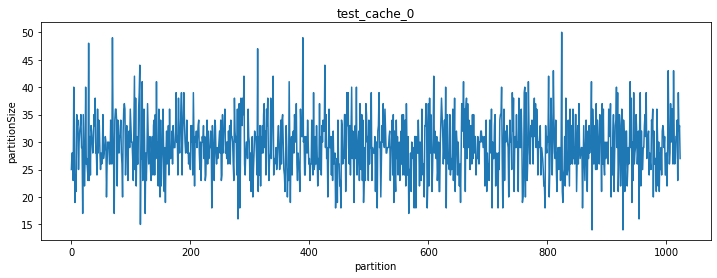

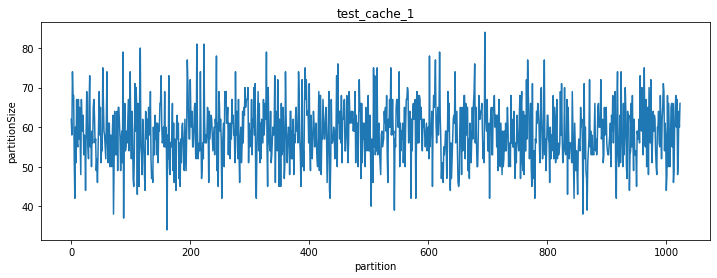

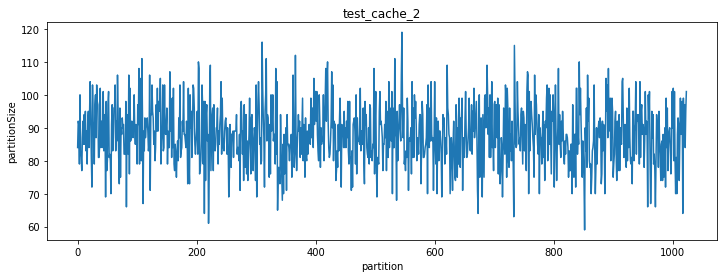

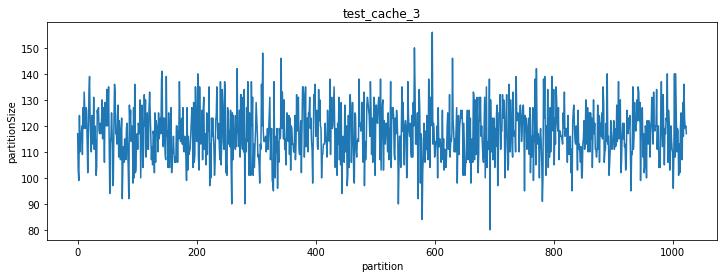

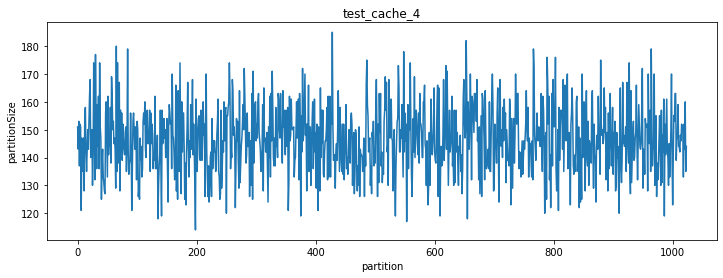

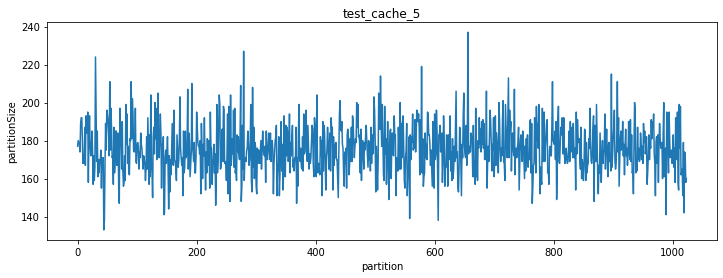

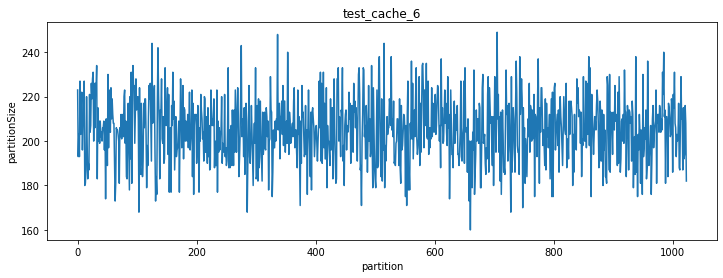

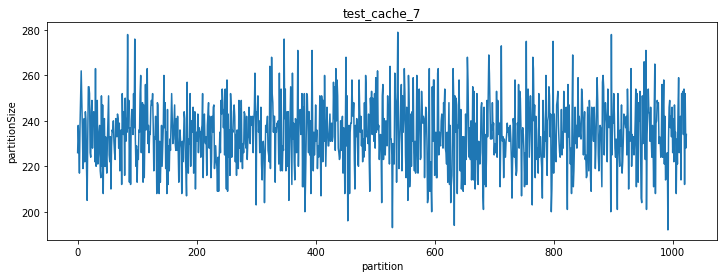

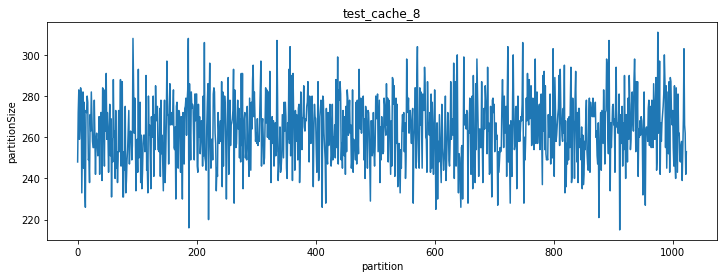

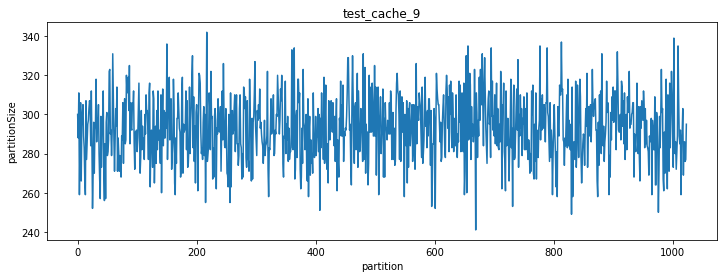

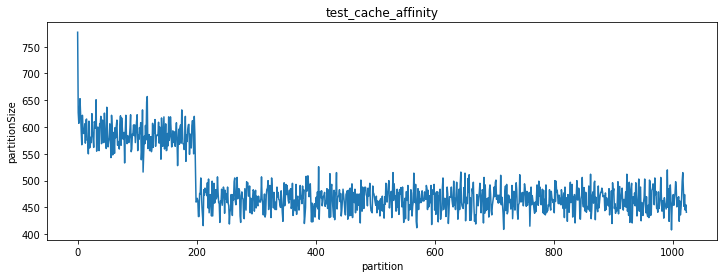

In [131]:
import matplotlib.pyplot as plt


%matplotlib inline

parts_by_cache_group = parts_df.groupby(['groupName'])

for name, group in parts_by_cache_group:
    group.plot(x='partition', 
               y='partitionSize', 
               ylabel='partitionSize', 
               title=name, 
               legend=None,
               figsize=(12,4))

In [132]:
import numpy as np
import pandas as pd

table_by_nodes = pd.pivot_table(df[['groupName', 'nodeAddresses', 'partitionSize']],
               index='nodeAddresses',
               columns='groupName',
               values='partitionSize',
               aggfunc=np.sum)
table_by_nodes

groupName,test_cache_0,test_cache_1,test_cache_2,test_cache_3,test_cache_4,test_cache_5,test_cache_6,test_cache_7,test_cache_8,test_cache_9,test_cache_affinity
nodeAddresses,,,,,,,,,,,
"127.0.0.1, 172.18.0.10",1379,2683,3904,5168,6659,7909,9348,10553,11869,13221,21550
"127.0.0.1, 172.18.0.11",1284,2683,4014,5065,6517,7765,9098,10318,11473,12809,21882
"127.0.0.1, 172.18.0.12",1137,2333,3475,4701,6011,7039,8122,9382,10457,11800,19850
"127.0.0.1, 172.18.0.13",1480,2906,4367,5837,7127,8918,10254,11784,13237,14956,24261
"127.0.0.1, 172.18.0.14",1341,2598,3832,5169,6408,7740,9020,10250,11629,12895,20934
"127.0.0.1, 172.18.0.15",1422,2818,4197,5526,7120,8550,10078,11380,12612,14070,23515
"127.0.0.1, 172.18.0.16",1299,2476,3677,5124,6284,7560,8899,10093,11371,12588,21490
"127.0.0.1, 172.18.0.17",1138,2265,3231,4511,5488,6868,7757,8937,10269,11279,18895
"127.0.0.1, 172.18.0.18",1411,2840,4221,5769,7174,8587,9961,11644,12696,14166,23432


In [133]:
table_by_nodes_z_scores = table_by_nodes.transform(z_score)

In [134]:
table_by_nodes_z_scores.unstack().loc[lambda x: x > 1.3]

groupName            nodeAddresses         
test_cache_0         127.0.0.1, 172.18.0.20    1.845953
test_cache_1         127.0.0.1, 172.18.0.20    1.815198
test_cache_2         127.0.0.1, 172.18.0.20    2.070001
test_cache_3         127.0.0.1, 172.18.0.20    1.995960
test_cache_4         127.0.0.1, 172.18.0.20    1.835712
test_cache_5         127.0.0.1, 172.18.0.13    1.393071
                     127.0.0.1, 172.18.0.20    1.977611
test_cache_6         127.0.0.1, 172.18.0.20    1.840051
test_cache_7         127.0.0.1, 172.18.0.20    1.945566
test_cache_8         127.0.0.1, 172.18.0.13    1.306640
                     127.0.0.1, 172.18.0.20    2.094438
test_cache_9         127.0.0.1, 172.18.0.13    1.426182
                     127.0.0.1, 172.18.0.20    1.948805
test_cache_affinity  127.0.0.1, 172.18.0.20    2.093626
dtype: float64

In [135]:
table_by_nodes_z_scores.unstack().loc[lambda x: x < -1.3]

groupName            nodeAddresses         
test_cache_0         127.0.0.1, 172.18.0.23   -1.359293
                     127.0.0.1, 172.18.0.9    -2.041736
test_cache_1         127.0.0.1, 172.18.0.23   -1.450993
                     127.0.0.1, 172.18.0.7    -1.337361
                     127.0.0.1, 172.18.0.9    -2.124043
test_cache_2         127.0.0.1, 172.18.0.23   -1.483599
                     127.0.0.1, 172.18.0.9    -1.864760
test_cache_3         127.0.0.1, 172.18.0.23   -1.391477
                     127.0.0.1, 172.18.0.9    -1.991579
test_cache_4         127.0.0.1, 172.18.0.22   -1.474908
                     127.0.0.1, 172.18.0.23   -1.303039
                     127.0.0.1, 172.18.0.9    -1.977108
test_cache_5         127.0.0.1, 172.18.0.22   -1.410755
                     127.0.0.1, 172.18.0.23   -1.340021
                     127.0.0.1, 172.18.0.9    -1.942244
test_cache_6         127.0.0.1, 172.18.0.23   -1.357100
                     127.0.0.1, 172.18.0.9    -2.128654
test

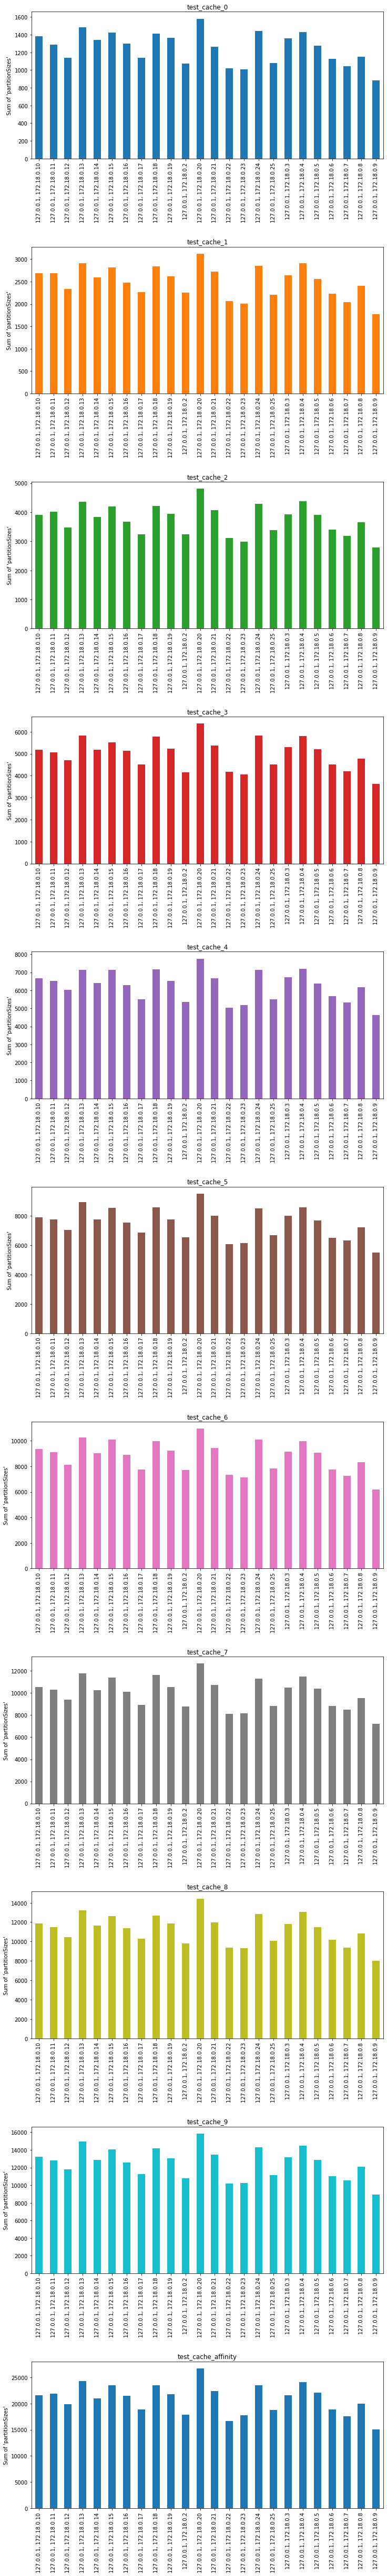

In [136]:
y_label_part_sizes = "Sum of 'partitionSizes'"

table_by_nodes.plot(kind='bar',
                      figsize=(12, 10 * len(table_by_nodes.T)),
                      ylabel=y_label_part_sizes,
                      xlabel="",
                      subplots=True,
                      legend=None,
                      sharex=False)

plt.subplots_adjust(hspace=0.6, top=0.7, bottom=0.1)

In [137]:
cols = ['groupName']
cols += attrs_names
cols.append('partitionSize')

print(cols)

table_by_attributes = pd.pivot_table(df[cols], 
                                     index=attrs_names,
                                     columns='groupName',
                                     values='partitionSize', 
                                     aggfunc=np.sum)
table_by_attributes

['groupName', 'CELL', 'partitionSize']


groupName,test_cache_0,test_cache_1,test_cache_2,test_cache_3,test_cache_4,test_cache_5,test_cache_6,test_cache_7,test_cache_8,test_cache_9,test_cache_affinity
CELL,,,,,,,,,,,
CELL-1,3899,8036,12097,15992,19946,24136,28042,32062,36063,40518,66560
CELL-2,3971,7923,11649,15806,19782,24005,27796,31961,35577,39515,65842
CELL-3,3503,6923,10543,14009,17411,20944,24293,27882,31126,34749,58027
CELL-4,3421,6747,10216,13694,17099,20409,23727,27129,30519,33860,55694
CELL-5,4140,8268,12582,16670,20604,24586,28691,32984,37662,41374,69566
CELL-6,4102,7943,11909,16182,19929,23815,28206,31965,36059,39945,66705
CELL-7,3591,7273,10622,14025,18030,21506,25191,28704,32137,35790,59249
CELL-8,3373,6887,10382,13622,17199,20599,24054,27313,30857,34249,58357


In [138]:
table_by_attributes_z_scores = table_by_attributes.transform(z_score)

In [139]:
table_by_attributes_z_scores.unstack().loc[lambda x: x > 1.3]

groupName            CELL  
test_cache_2         CELL-5    1.463077
test_cache_3         CELL-5    1.311096
test_cache_8         CELL-5    1.363530
test_cache_affinity  CELL-5    1.358682
dtype: float64

In [140]:
table_by_attributes_z_scores.unstack().loc[lambda x: x < -1.3]

groupName            CELL  
test_cache_affinity  CELL-4   -1.308688
dtype: float64

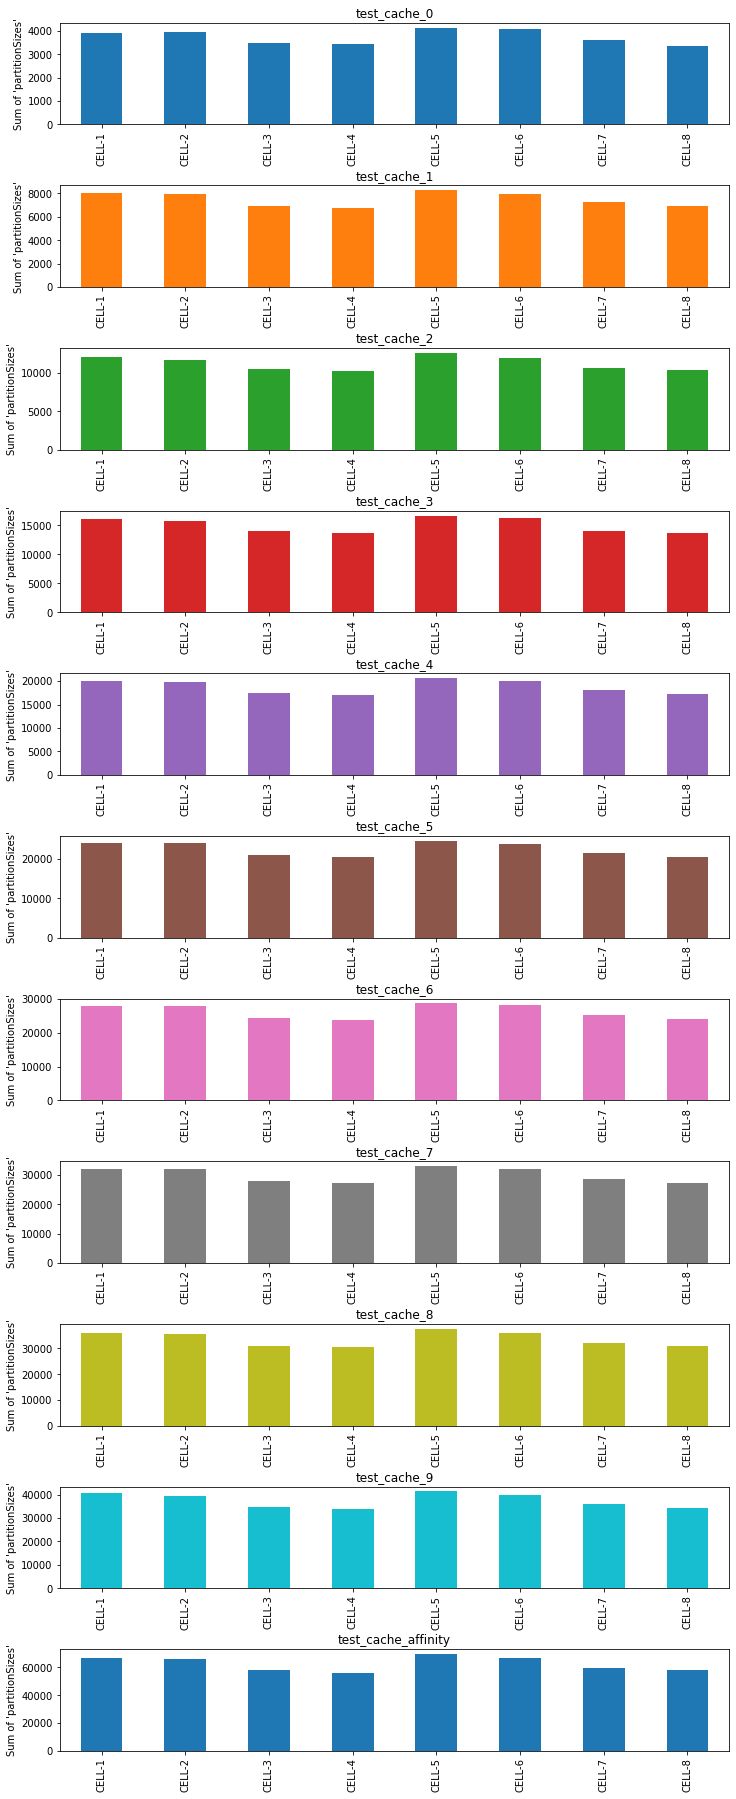

In [141]:
table_by_attributes.plot(kind='bar',
                           figsize=(12, 5 * len(table_by_attributes)),
                           ylabel=y_label_part_sizes,
                           xlabel="",
                           subplots=True,
                           legend=None,
                           sharex=False)

plt.subplots_adjust(hspace=0.6, top=0.7, bottom=0.1)